<a href="https://colab.research.google.com/github/reddragon/book-codelabs/blob/main/Data_Quantization_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!wget https://www.nasa.gov/sites/default/files/styles/full_width_feature/public/thumbnails/image/pia23378-16.jpg

--2021-06-08 22:57:51--  https://www.nasa.gov/sites/default/files/styles/full_width_feature/public/thumbnails/image/pia23378-16.jpg
Resolving www.nasa.gov (www.nasa.gov)... 99.84.198.90, 99.84.198.39, 99.84.198.2, ...
Connecting to www.nasa.gov (www.nasa.gov)|99.84.198.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129737 (127K) [image/jpeg]
Saving to: ‘pia23378-16.jpg.1’

pia23378-16.jpg.1   100%[===================>] 126.70K  --.-KB/s    in 0.02s   

2021-06-08 22:57:52 (8.19 MB/s) - ‘pia23378-16.jpg.1’ saved [129737/129737]



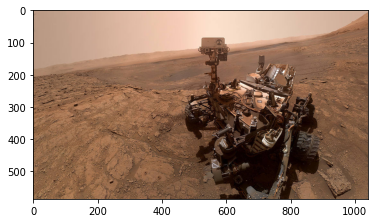

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('pia23378-16.jpg')
plt.imshow(img)

In [24]:
print(img.shape)

(586, 1041, 3)


In [25]:
img.dtype

dtype('uint8')

In [26]:
import numpy as np

img_min = np.min(img)
img_max = np.max(img)
print('Min: %d, Max: %d' % (img_min, img_max))

Min: 0, Max: 255


In [76]:
import math
def quantize(x, x_max, x_min, b):
  x = np.minimum(x, x_max)
  x = np.maximum(x, x_min)

  s = (x_max - x_min ) * 1.0 / (2**b)
  x_q = ((x - x_min) / s)
  x_q = np.minimum(x_q, 2**b - 1)
  return x_q.astype(np.uint8)

def dequantize(x_q, x_max, x_min, b):
  s = (x_max - x_min ) * 1.0 / (2**b)
  x = (s * x_q) + x_min
  return x.astype(np.uint8)
  # return (x_q * 1.0 * s).astype(dtype=np.uint8)

In [88]:
np.array([range(-10, 10, 1)])

array([[-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9]])

In [70]:
quantize(np.array([-10.0, -5.0, 2.0, 9.99, 10.0, 222.0]), 10.0, -10.0, 3)

array([0, 2, 4, 7, 7, 7], dtype=uint8)

In [72]:
dequantize(np.array([0 , 2 , 4, 7 , 7 , 7 ]), 10.0, -10.0, 3)

array([-10. ,  -5. ,   0. ,   7.5,   7.5,   7.5])

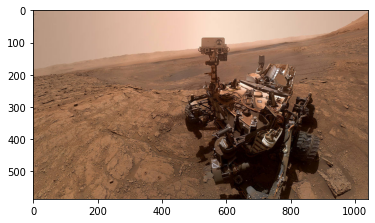

In [84]:
b = 8
plt.imshow(dequantize(quantize(img * 1.0, img_max, img_min, b), img_max, img_min, b))

In [18]:
img[0:100]

array([[[186, 154, 133],
        [186, 154, 133],
        [186, 154, 133],
        ...,
        [205, 173, 152],
        [205, 173, 152],
        [206, 174, 149]],

       [[186, 154, 133],
        [186, 154, 133],
        [186, 154, 133],
        ...,
        [205, 173, 152],
        [205, 173, 152],
        [207, 175, 152]],

       [[186, 154, 133],
        [186, 154, 133],
        [186, 154, 133],
        ...,
        [205, 173, 152],
        [205, 173, 152],
        [206, 175, 155]],

       ...,

       [[184, 152, 131],
        [184, 152, 131],
        [184, 152, 131],
        ...,
        [129,  88,  66],
        [131,  90,  68],
        [136, 100,  74]],

       [[184, 152, 131],
        [184, 152, 131],
        [184, 152, 131],
        ...,
        [129,  93,  71],
        [147, 111,  89],
        [134,  98,  72]],

       [[184, 152, 131],
        [184, 152, 131],
        [184, 152, 131],
        ...,
        [103,  66,  47],
        [125,  88,  69],
        [130,  93,  67]]